<a href="https://colab.research.google.com/github/Wanita-8943/efficientnet_keras_transfer_learning/blob/master/Predict_Male_200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 392, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 392 (delta 161), reused 157 (delta 130), pack-reused 184
Receiving objects: 100% (392/392), 7.96 MiB | 23.96 MiB/s, done.
Resolving deltas: 100% (234/234), done.
/content/efficientnet_keras_transfer_learning


In [4]:
df = pd.read_csv (r'/content/drive/MyDrive/cut_panoramic/Flim_pano_Male.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Filename,Path_filename,Sex,Floder
0,1,1,7,Y7M,VV03.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
1,2,1,7,Y7M,Flip_VV03.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
2,3,2,7,Y7M,VV04.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
3,4,2,7,Y7M,Flip_VV04.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
4,5,3,7,Y7M,VV05.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
...,...,...,...,...,...,...,...,...
2339,71,50,25,Y25M,J146.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
2340,72,51,25,Y25M,J166.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
2341,73,52,25,Y25M,J169.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt
2342,74,53,25,Y25M,J183.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Rt


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Flimpano_Male_200.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [6]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Flimpano_Male_200.h5')
height = width = model.input_shape[1]

In [7]:
base_dir = '/content/drive/MyDrive/TVT_Male'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [8]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1084 images belonging to 18 classes.
{0: 'Y10M', 1: 'Y11M', 2: 'Y12M', 3: 'Y13M', 4: 'Y15M', 5: 'Y16M', 6: 'Y17M', 7: 'Y18M', 8: 'Y19M', 9: 'Y20M', 10: 'Y21M', 11: 'Y22M', 12: 'Y23M', 13: 'Y24M', 14: 'Y25M', 15: 'Y7M', 16: 'Y8M', 17: 'Y9M'}


In [9]:
test = df[df['Fig_Person_Sex'].between(37,40)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Filename,Path_filename,Sex,Floder
72,73,37,7,Y7M,VV62.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
73,74,37,7,Y7M,Flip_VV62.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
74,75,38,7,Y7M,VV63.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
75,76,38,7,Y7M,Flip_VV63.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
76,77,39,7,Y7M,VV65.jpg,/content/drive/My Drive/cut_panoramic/7 year/7...,เพศชาย,Both
...,...,...,...,...,...,...,...,...
2209,80,40,24,Y24M,Flip_Z393.jpg,/content/drive/My Drive/cut_panoramic/24 year/...,เพศชาย,Both
2326,58,37,25,Y25M,Flip_J267.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Lt
2327,59,38,25,Y25M,Flip_J355.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Lt
2328,60,39,25,Y25M,Flip_J379.jpg,/content/drive/My Drive/cut_panoramic/25 year/...,เพศชาย,Lt


In [10]:
act = test['Class'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [11]:
# act

In [12]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [13]:
predict_image(path[0])

1/1 [==============================] - 2s 2s/step


array([1.9159533e-02, 1.2492626e-02, 7.8789406e-03, 3.4009615e-06,
       4.3914779e-06, 8.3275825e-07, 7.3202744e-07, 3.2526193e-06,
       4.4600720e-06, 3.5514211e-05, 2.7096939e-06, 1.1612711e-06,
       3.3749586e-06, 1.3533311e-05, 1.0076188e-05, 5.1841789e-01,
       2.5838202e-01, 1.8358549e-01], dtype=float32)

In [14]:
no = np.argmax(predict_image(path[0]))
labels[no]

1/1 [==============================] - 0s 63ms/step


'Y7M'

In [15]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

1/1 [==============================] - 0s 65ms/step


In [16]:
pred_list

['Y7M',
 'Y7M',
 'Y7M',
 'Y8M',
 'Y8M',
 'Y8M',
 'Y11M',
 'Y10M',
 'Y10M',
 'Y9M',
 'Y8M',
 'Y9M',
 'Y11M',
 'Y11M',
 'Y9M',
 'Y10M',
 'Y8M',
 'Y8M',
 'Y11M',
 'Y10M',
 'Y8M',
 'Y8M',
 'Y8M',
 'Y10M',
 'Y8M',
 'Y12M',
 'Y12M',
 'Y8M',
 'Y9M',
 'Y11M',
 'Y11M',
 'Y10M',
 'Y12M',
 'Y11M',
 'Y11M',
 'Y17M',
 'Y12M',
 'Y10M',
 'Y11M',
 'Y12M',
 'Y11M',
 'Y12M',
 'Y11M',
 'Y13M',
 'Y17M',
 'Y17M',
 'Y11M',
 'Y11M',
 'Y11M',
 'Y10M',
 'Y10M',
 'Y12M',
 'Y13M',
 'Y13M',
 'Y17M',
 'Y17M',
 'Y10M',
 'Y10M',
 'Y13M',
 'Y13M',
 'Y17M',
 'Y25M',
 'Y25M',
 'Y19M',
 'Y13M',
 'Y13M',
 'Y13M',
 'Y19M',
 'Y11M',
 'Y15M',
 'Y13M',
 'Y13M',
 'Y17M',
 'Y17M',
 'Y17M',
 'Y16M',
 'Y12M',
 'Y12M',
 'Y12M',
 'Y15M',
 'Y24M',
 'Y17M',
 'Y13M',
 'Y13M',
 'Y17M',
 'Y19M',
 'Y25M',
 'Y19M',
 'Y13M',
 'Y11M',
 'Y17M',
 'Y17M',
 'Y17M',
 'Y17M',
 'Y17M',
 'Y17M',
 'Y10M',
 'Y20M',
 'Y17M',
 'Y17M',
 'Y20M',
 'Y25M',
 'Y12M',
 'Y19M',
 'Y12M',
 'Y17M',
 'Y25M',
 'Y17M',
 'Y17M',
 'Y19M',
 'Y19M',
 'Y11M',
 'Y25M',
 

In [17]:
prob_list[0]

0.5184179

In [18]:
# data_train = valframe
# #เช็คคลาสใน Predicted
# pred_class = set(data_train['category_ov'])
# print('Predicted : ',len(pred_class))
# print(pred_class)
# print('-'*50)
# #เช็คคลาสใน Actual
# classe = set(data_train['class'])
# print('Actual : ',len(classe))
# print(classe)

In [19]:
pred = np.array(pred_list) #แปลงเป็น array
act = np.array(act)

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 8.8%
              precision    recall  f1-score   support

        Y10M       0.00      0.00      0.00         7
        Y11M       0.12      0.29      0.17         7
        Y12M       0.14      0.33      0.20         6
        Y13M       0.00      0.00      0.00         8
        Y15M       0.00      0.00      0.00         8
        Y16M       0.00      0.00      0.00         7
        Y17M       0.08      0.29      0.12         7
        Y18M       0.00      0.00      0.00         6
        Y19M       0.00      0.00      0.00         4
        Y20M       0.00      0.00      0.00         8
        Y21M       0.00      0.00      0.00         8
        Y22M       0.00      0.00      0.00         5
        Y23M       0.00      0.00      0.00         8
        Y24M       0.00      0.00      0.00         8
        Y25M       0.14      0.25      0.18         4
         Y7M       1.00      0.38      0.55         8
         Y8M       0.09      0.12      0.11         8


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Predicted label')

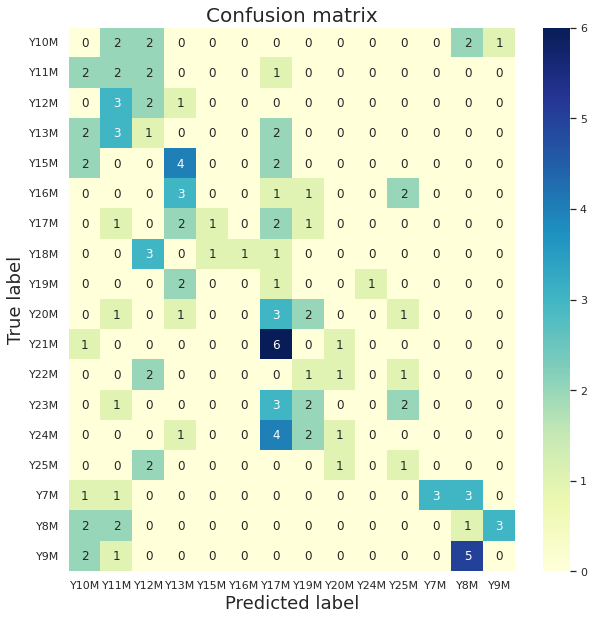

In [21]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)